In [5]:
import sys
import pandas as pd
sys.path.append("../getData")
sys.path.append("../functions")
import bdStocks
import numpy as np
import transformationsDataframes as tD
bd=bdStocks.getData()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sql="select distinct(sector) from sectors"
sql1="select distinct(exchange) from stocks"
sectors=[e[0] for e in bd. executeQuery(sql)]
exchanges=[e[0] for e in bd. executeQuery(sql1)]
exchanges=["LSE","MC","XETRA","PA","US","TO","MI"]
exchangesIndex={"BE":"DAX30","NEO":"SPTSX","LSE":"FTSE100","MC":"IBEX35","US":"SP500","XETRA":"DAX30","VX":"SMI","PA":"CAC40","TO":"SPTSX","MI":"FTSEMIB","AS":"AEX"}
columnasPrecios=["Adjusted_close","sector"]
columnasFundamental=["netIncome","ebitda","totalRevenue","totalAssets","sector"]
CALCULAR_RATIOS=True

In [ ]:
exchange='MC'
sector="HealthCare"
indice='ibex35'

In [27]:
#CONSULTAS TAM STOCKS
NUMERO_STOCKS_FUNDAMENTAL=("select count(distinct (stock)) from {}_fundamental;".format(exchange),None)
NUMERO_STOCKS_PRECIOS=("select count(distinct (stock)) from {}_precios;".format(exchange),None)
NUMERO_STOCKS_ADMIRAL=("select count(distinct (code)) from admiralmarkets where exchange=%s;",(exchange,))
NUMERO_STOCKS_DEGIRO=("select count(distinct (code)) from degiro where exchange=%s;",(exchange,))
NUMERO_STOCKS_INDICE=("select count(distinct (company)) from indices where indice=%s;",(indice,))
NUMERO_STOCKS_POR_SECTOR=("select sector ,count(*) as cuenta from sectors where exchange=%s  group by (sector);",(exchange,))
NUMERO_STOCKS_POR_SECTOR_DEGIRO=("select sector ,count(*) as cuenta from sectors inner join degiro on sectors.stock=degiro.code\
 and sectors.exchange=degiro.exchange where sectors.exchange=%s group by (sector);",(exchange,))
NUMERO_STOCKS_POR_SECTOR_ADMIRAL=("select sector ,count(*) as cuenta from sectors inner join admiralmarkets on sectors.stock=admiralmarkets.code\
 and sectors.exchange=admiralmarkets.exchange where sectors.exchange=%s group by (sector);",(exchange,))
NUMERO_STOCKS_POR_SECTOR_INDICE=("select sector ,count(*) as cuenta from sectors inner join indices on sectors.stock=indices.company\
 where sectors.exchange=%s  group by (sector);",(exchange,))

NameError: name 'indice' is not defined

In [7]:
#CONSULTAS RESULTADOS
for exchange in list(exchanges.values):
    exchange=exchange[0]
    try:
        if exchange is None:
            CONSULTA_ULTIMOS_RESULTADOS=("select * from ratios_results;",None)
        else:
            CONSULTA_ULTIMOS_RESULTADOS=("select * from ratios_results where exchange=%s and report_date>'2020-01-01';",(exchange,))

        data=bd.executeQueryDataFrame(CONSULTA_ULTIMOS_RESULTADOS[0],params=CONSULTA_ULTIMOS_RESULTADOS[1])
        stocks=np.unique(data.stock)
        from numpy import mean,median
        data.replace([np.inf, -np.inf], np.nan, inplace=True)
        data=data.dropna(subset=['per',"earnings_per"])
        a=(abs(data.per-data.earnings_per)*2/(abs(data.per)+abs(data.earnings_per)))
        print("Exchange %s, mediana %s, media %s"%(exchange,median(a),mean(a)))
    except Exception as e:
        pass

Exchange US, mediana nan, media 0.6998591330916589
Exchange MC, mediana 0.00774906254573856, media 0.17077451487325057
Exchange LSE, mediana 0.6644963448285875, media 0.7275596597825632
Exchange PA, mediana 0.6683377539193478, media 0.8200057612532492
Exchange MI, mediana 0.004247055007286182, media 0.0837270883878789
Exchange AU, mediana nan, media 0.8639822439178
Exchange AT, mediana 0.003162949739773166, media 0.14993213702558134


In [6]:

exchanges=(bd.executeQueryDataFrame("select distinct (exchange) from ratios_results;"))
exchanges


,exchange
0,US
1,MC
2,LSE
3,PA
4,MI
5,AU
6,AT


In [ ]:
from  scipy.stats import pareto
from  scipy.stats import expon
array=np.arange(0,2,0.01)
u=[expon.pdf(x=e,scale=0.01) for e in array]
sns.relplot(array,u)
array=np.arange(1,2,0.01)
par=[pareto(b=1).pdf(e) for e in array]

sns.relplot(array,par)

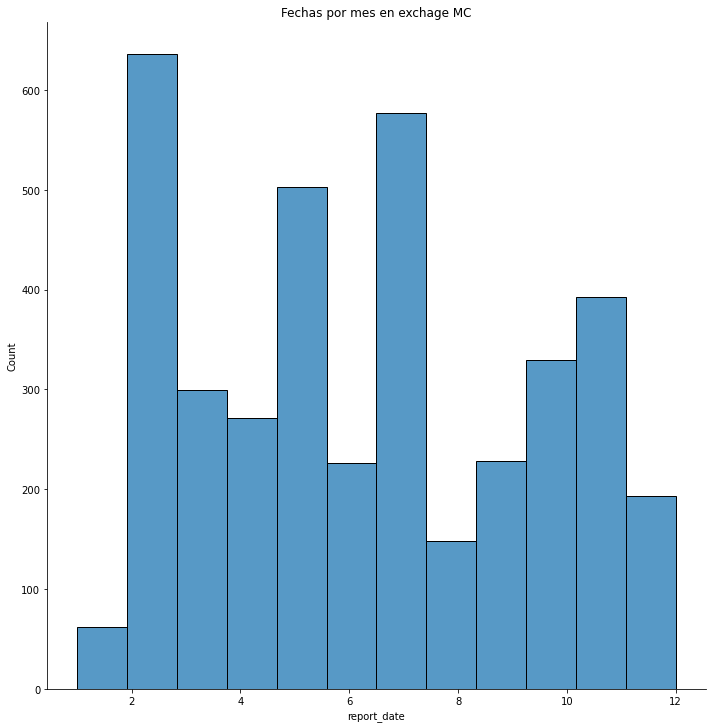

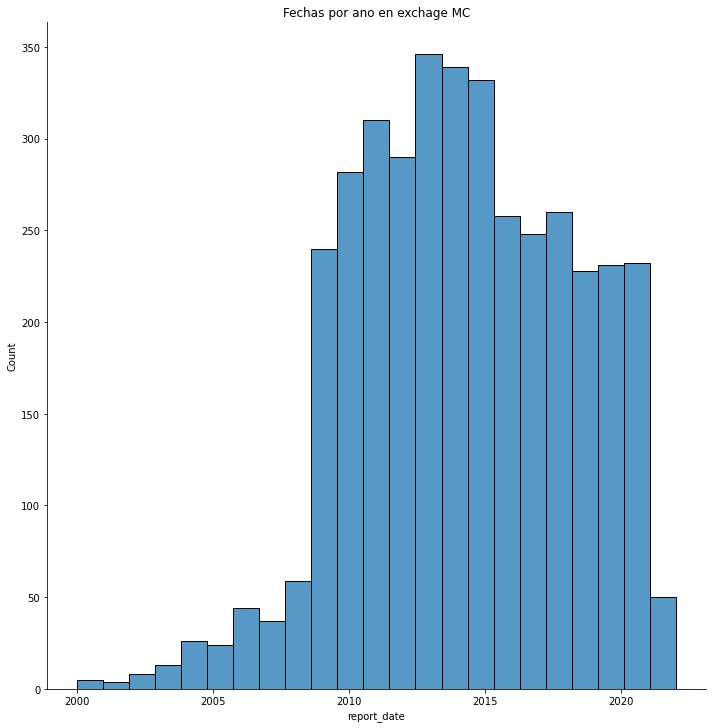

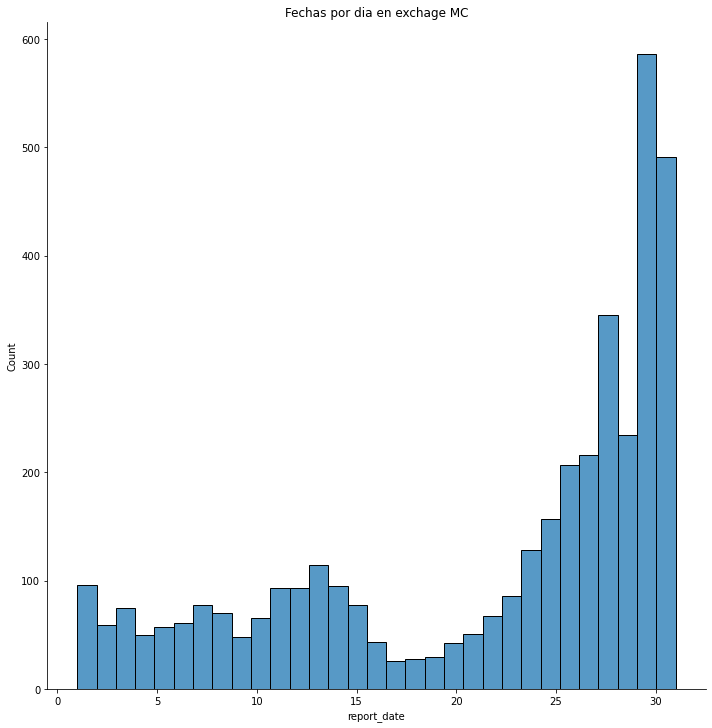

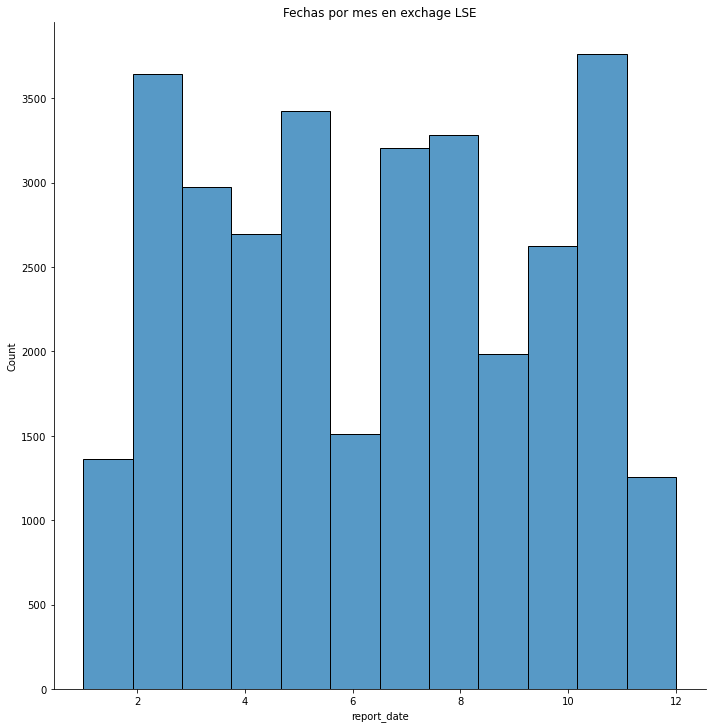

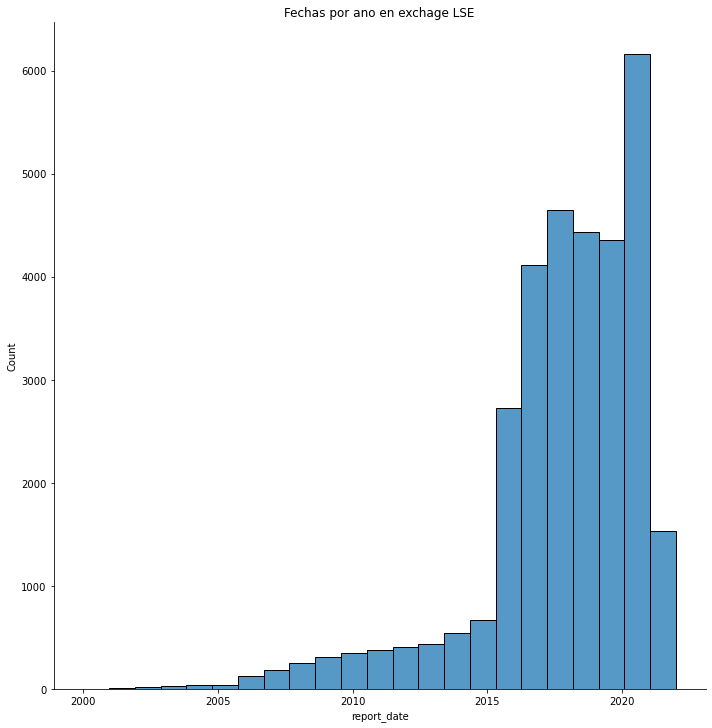

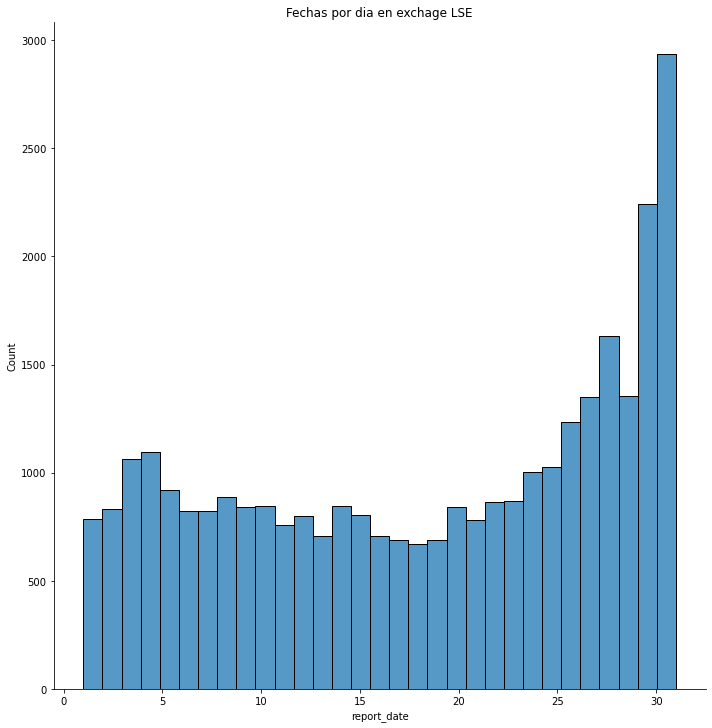

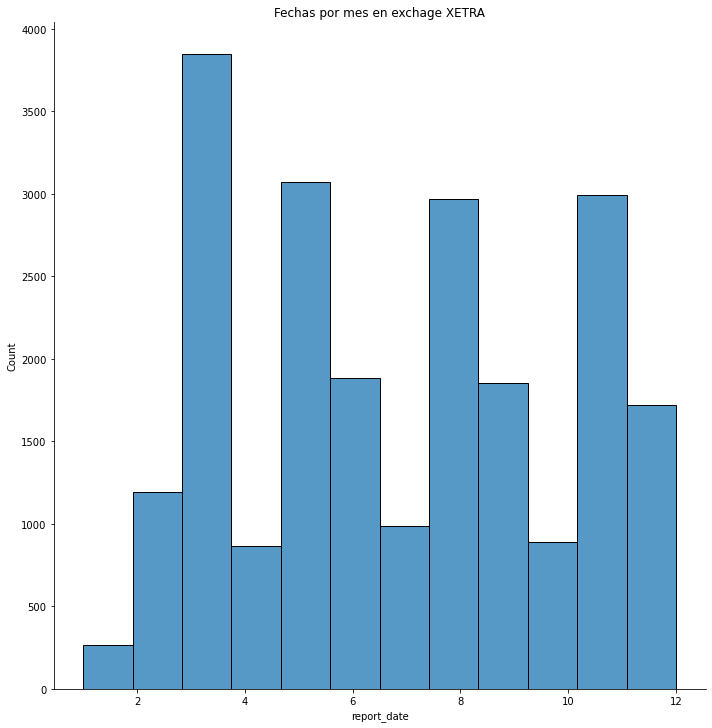

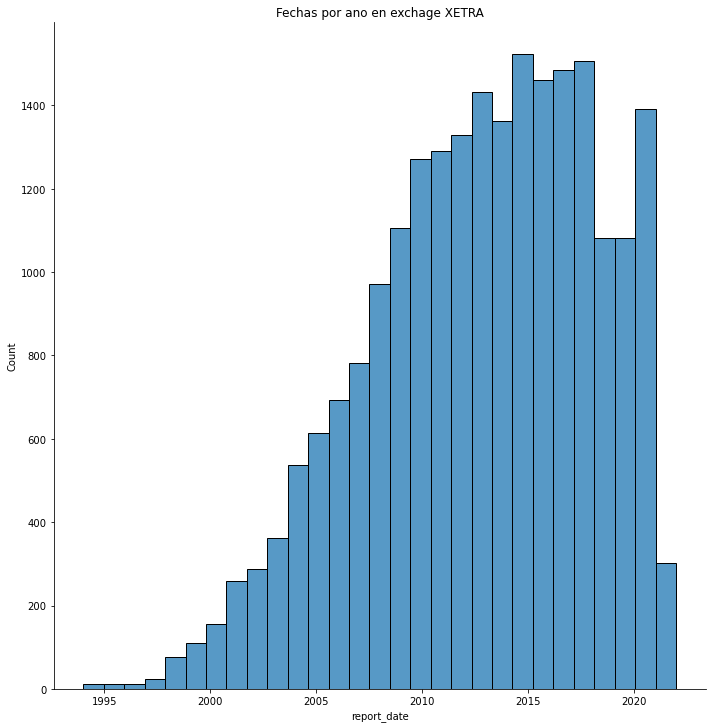

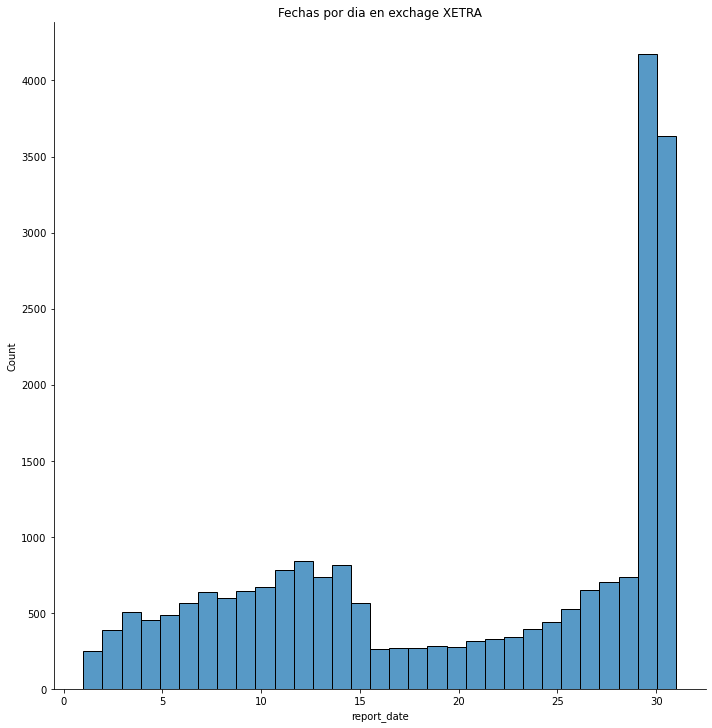

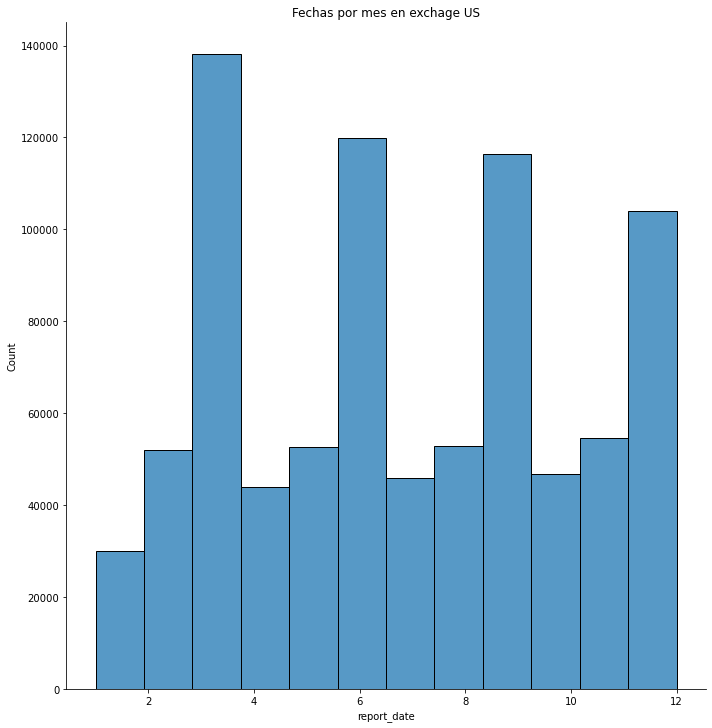

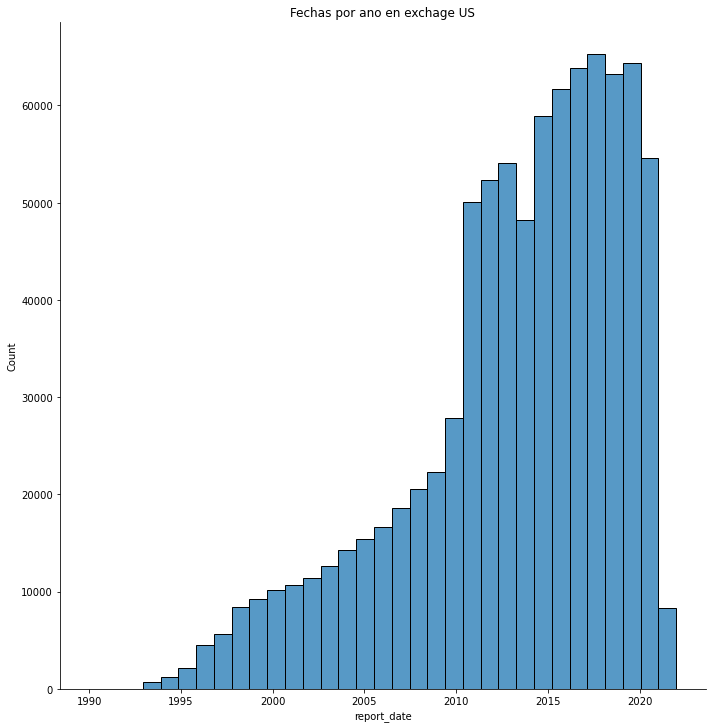

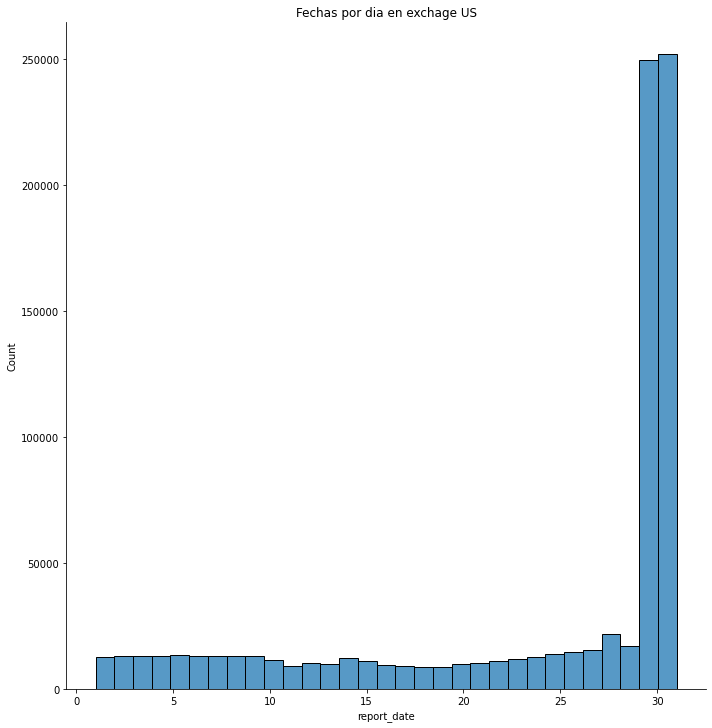

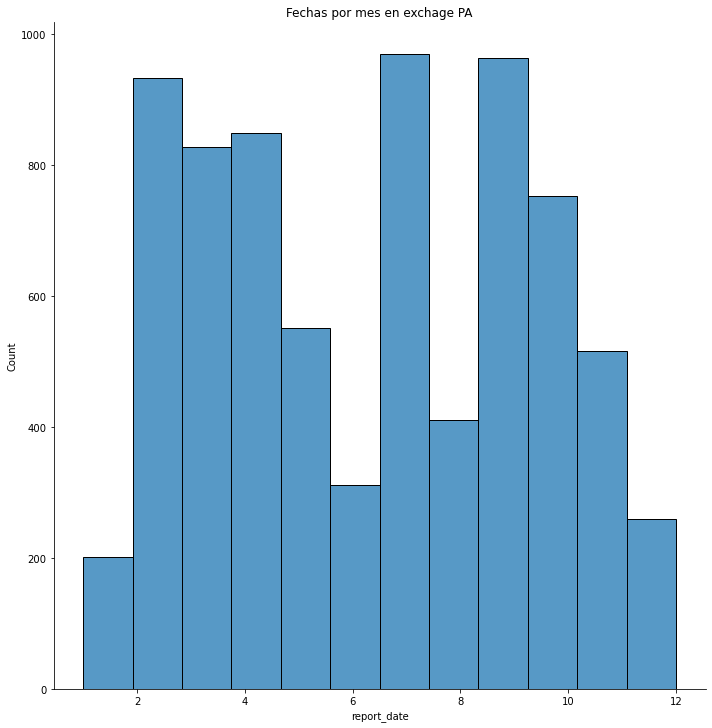

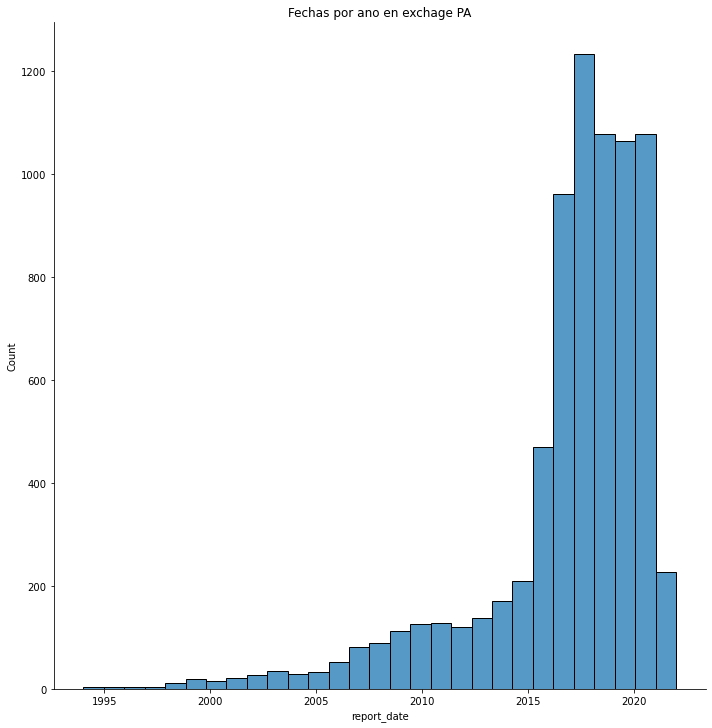

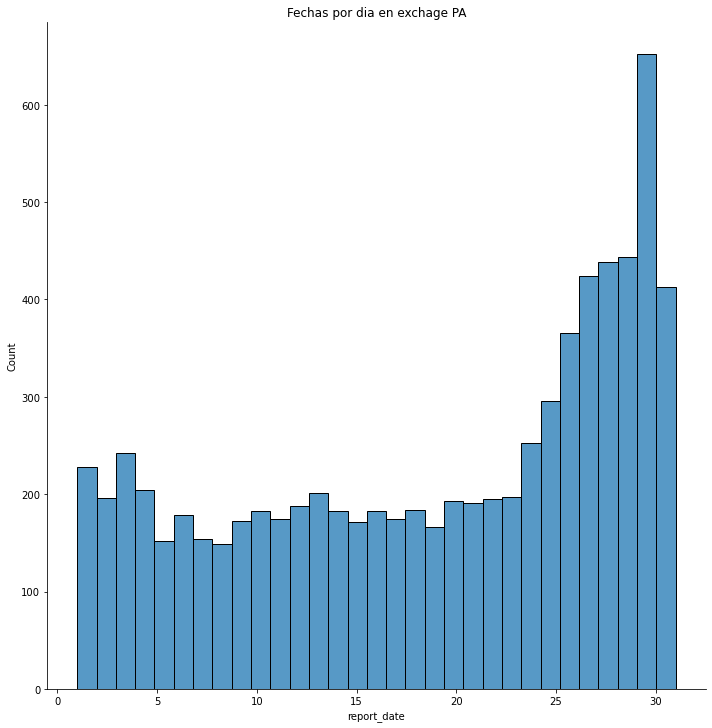

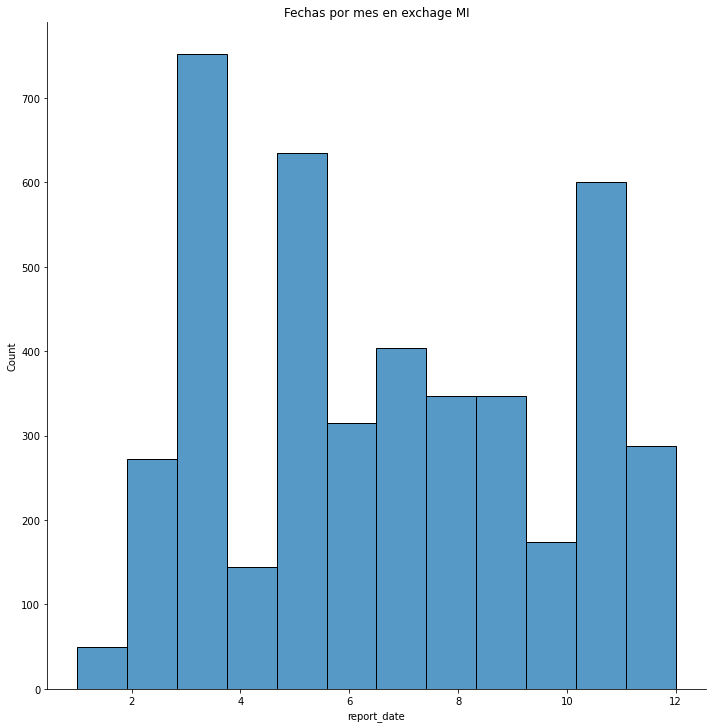

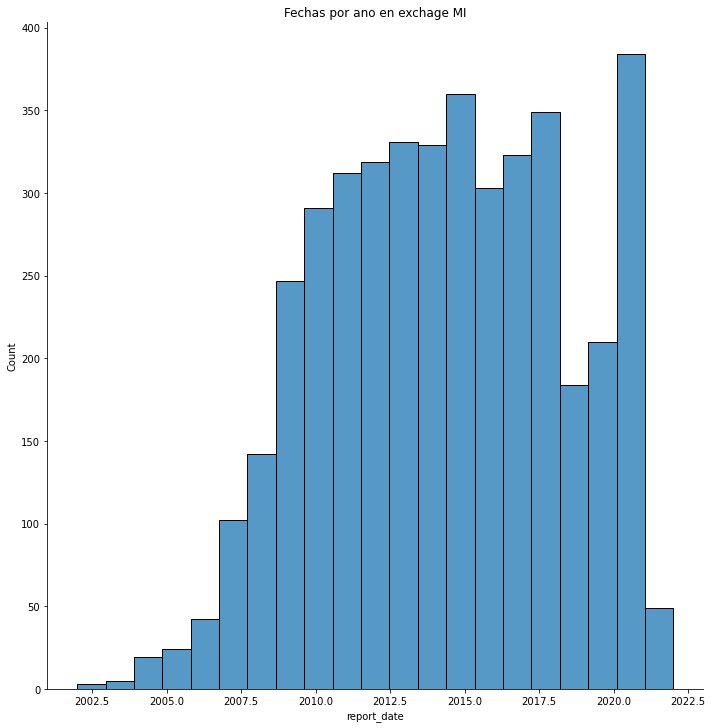

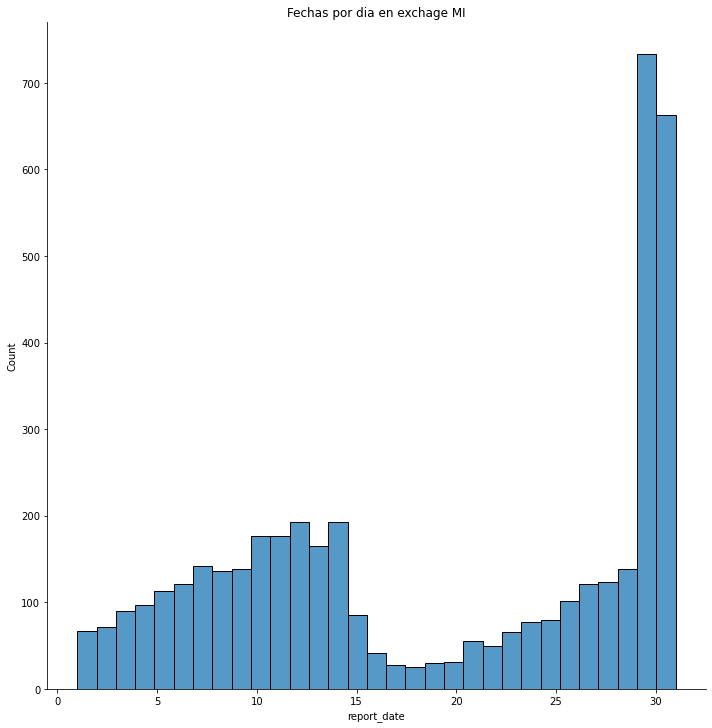

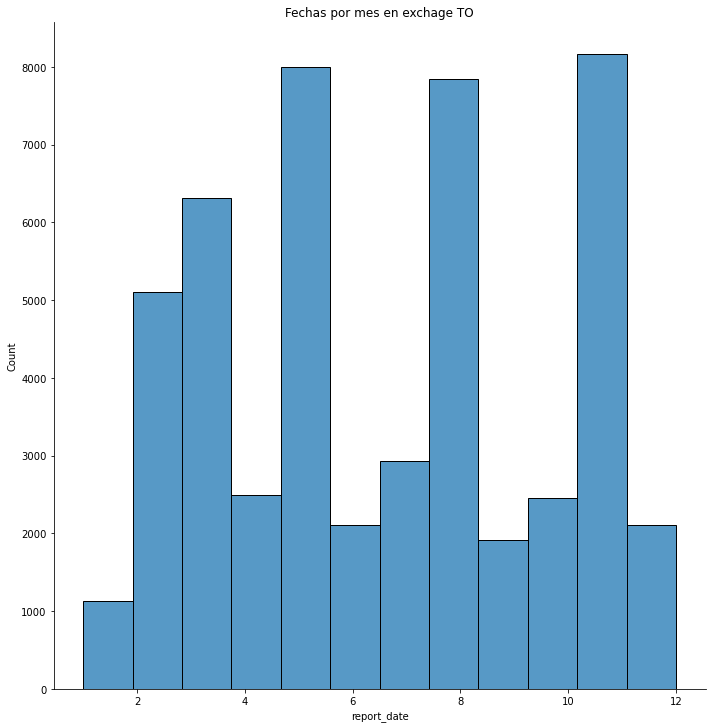

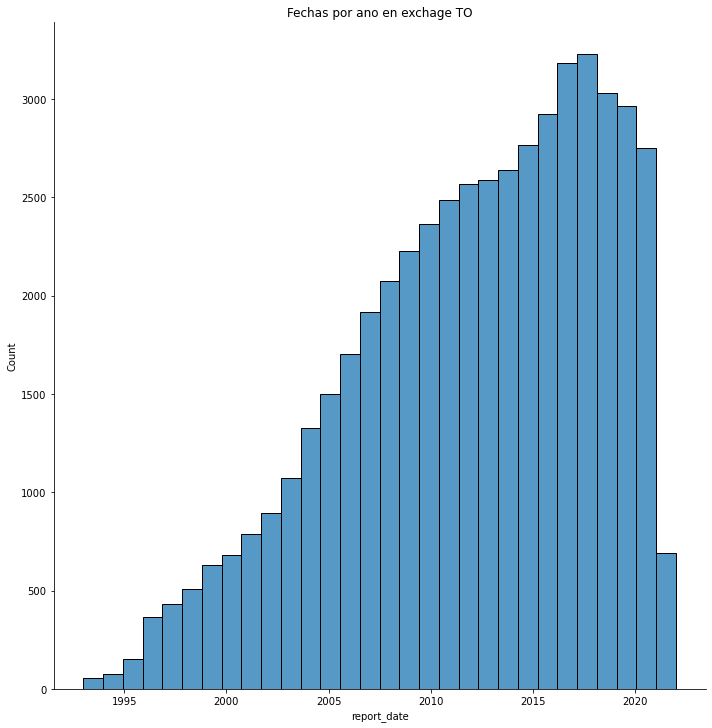

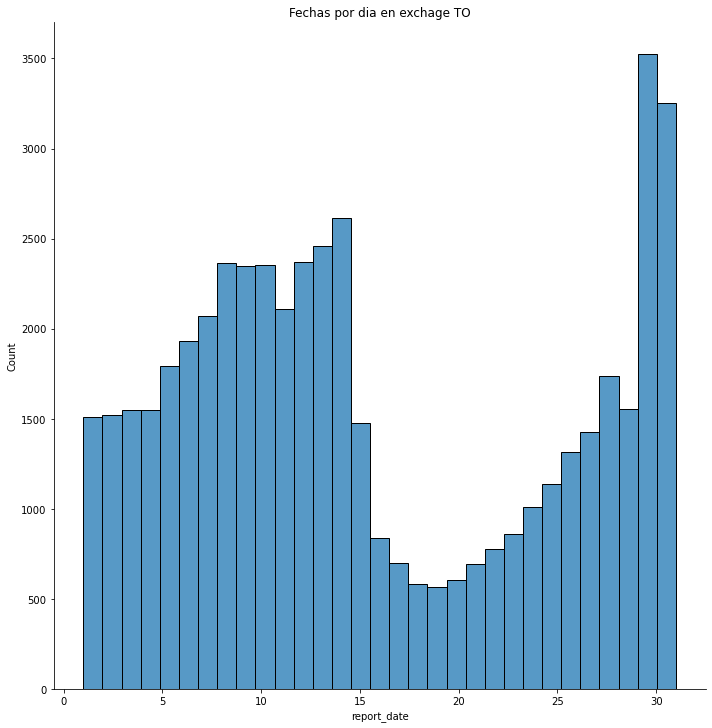

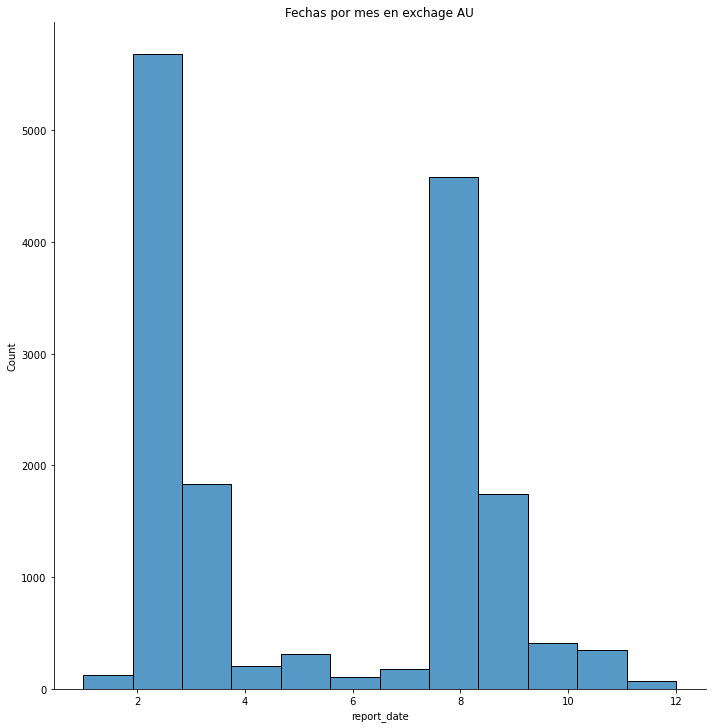

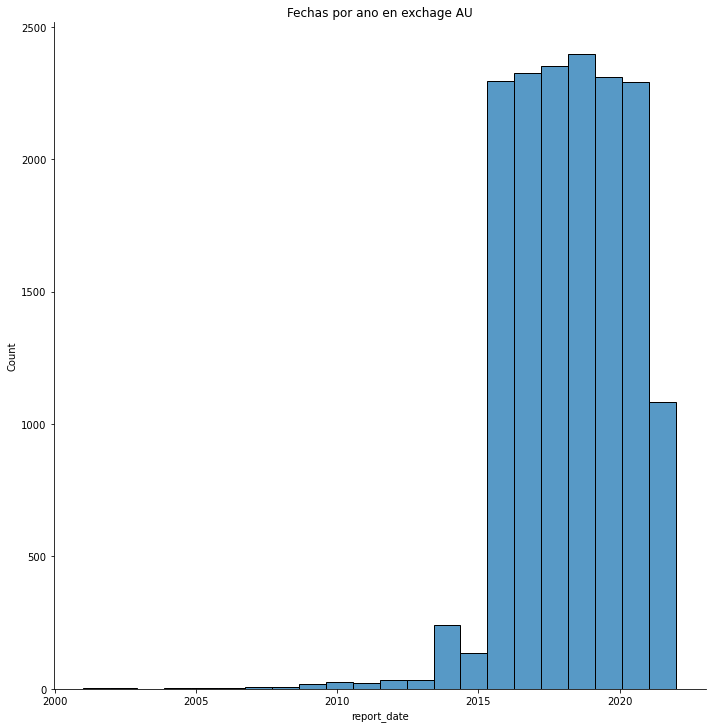

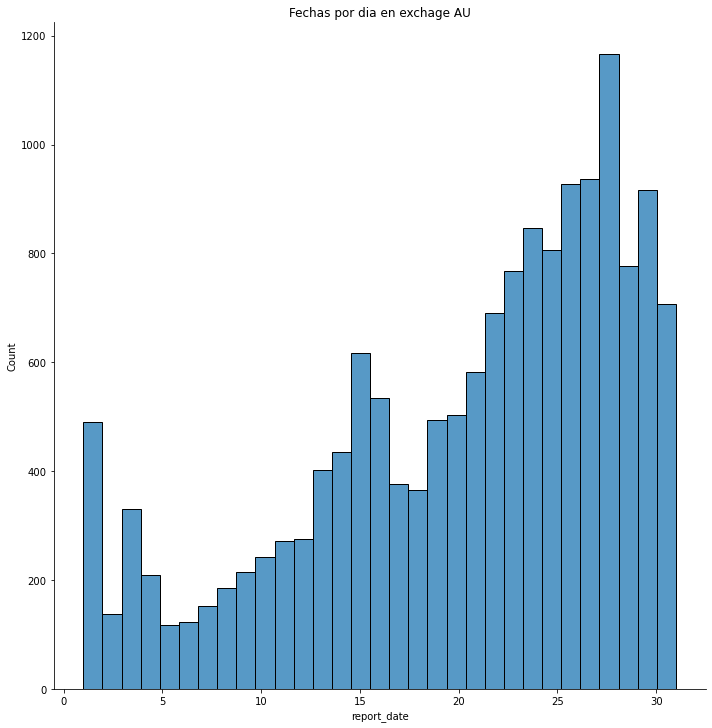

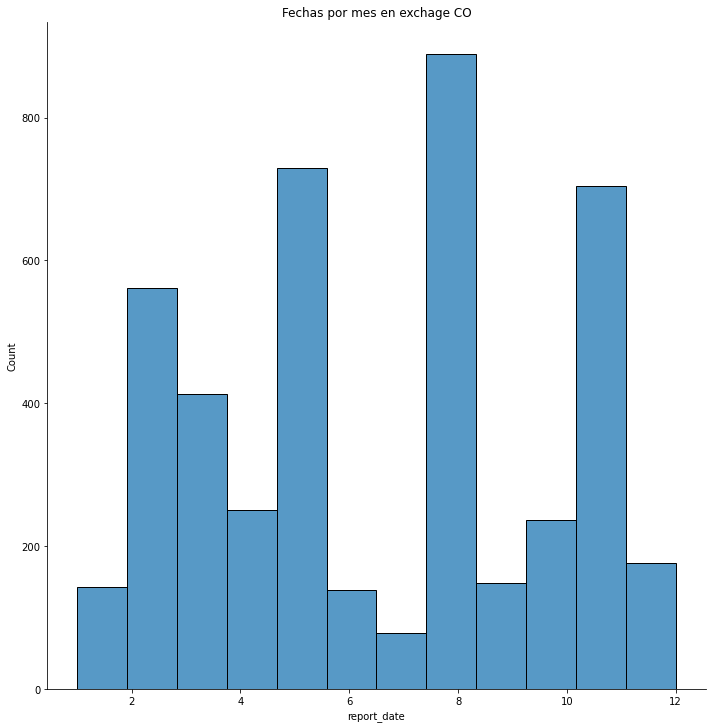

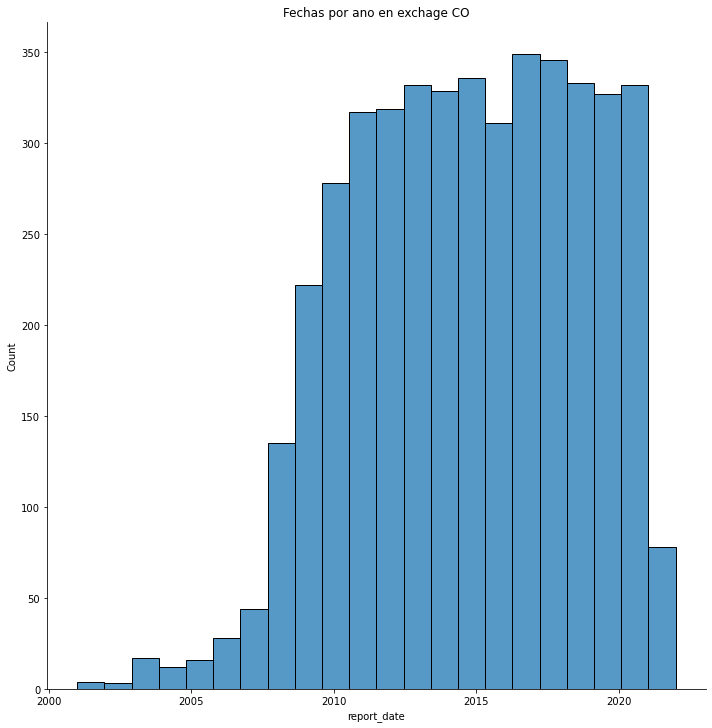

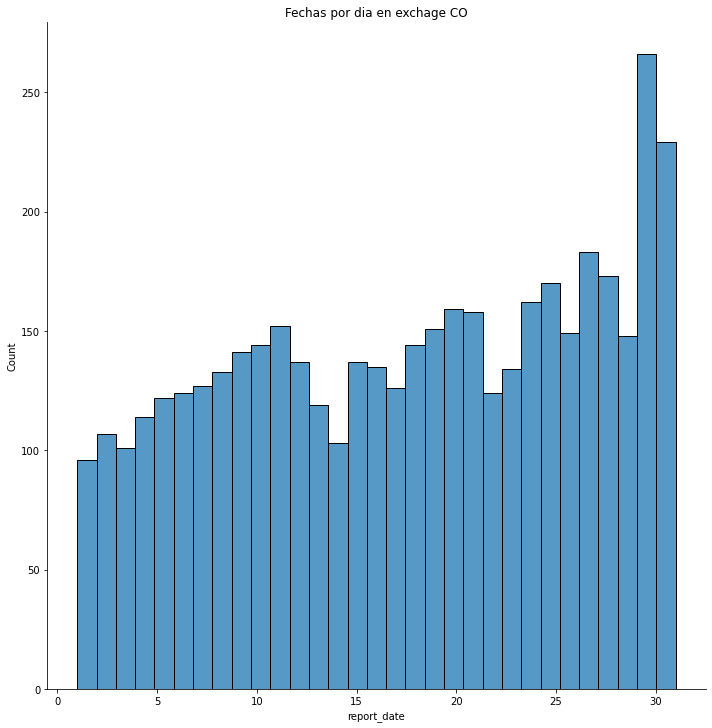

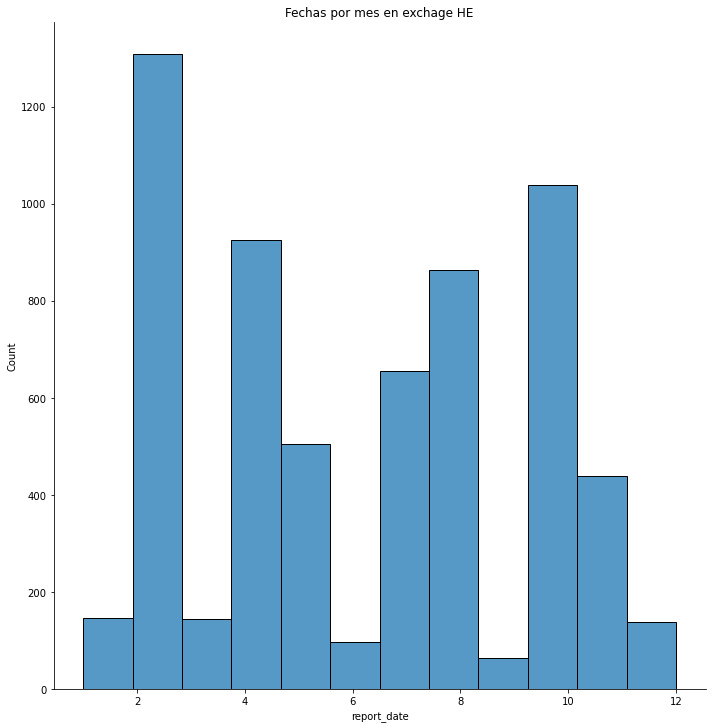

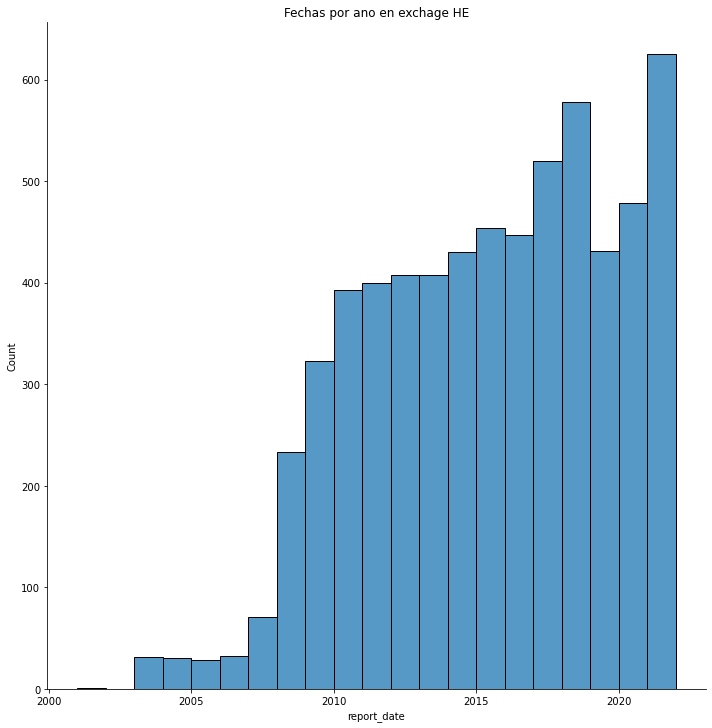

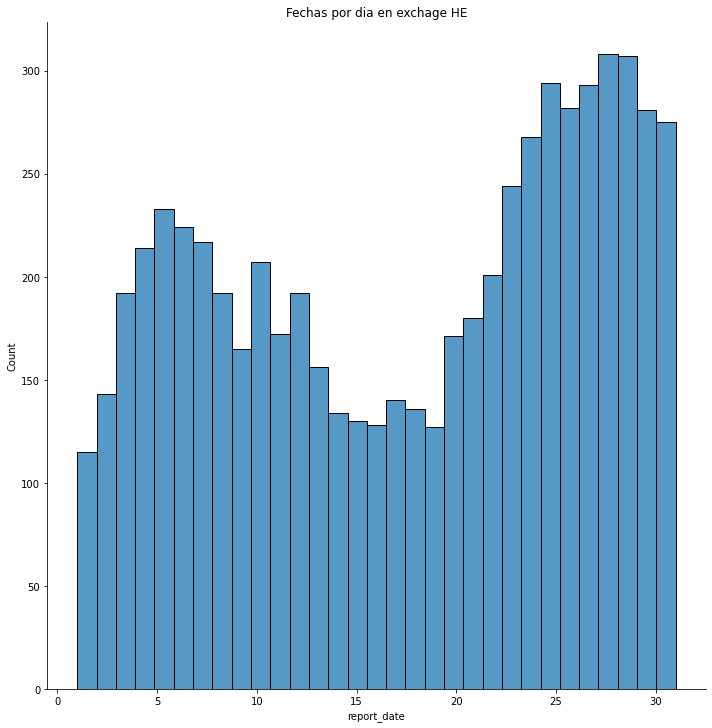

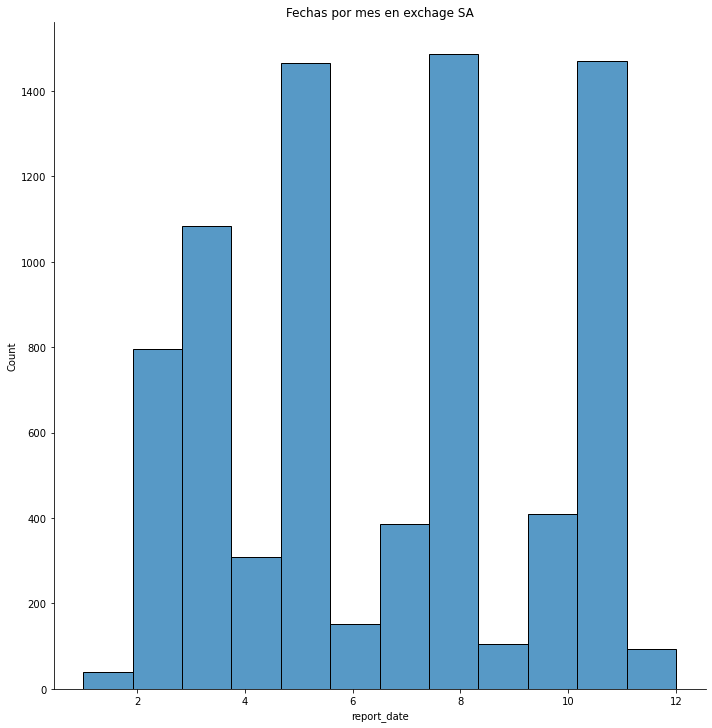

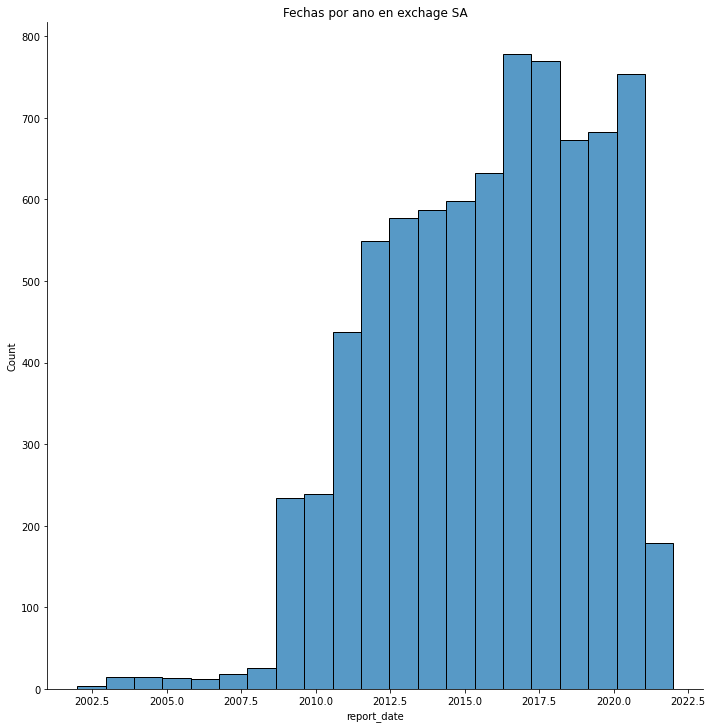

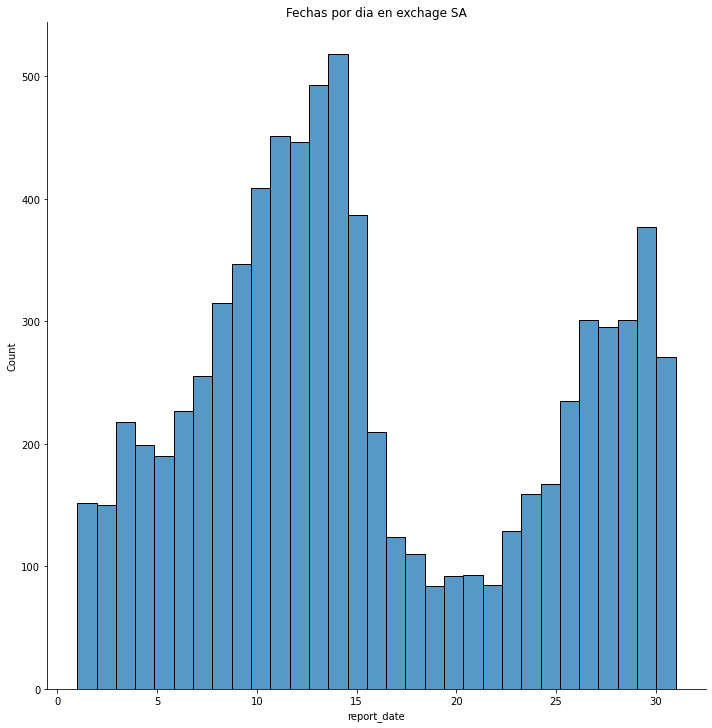

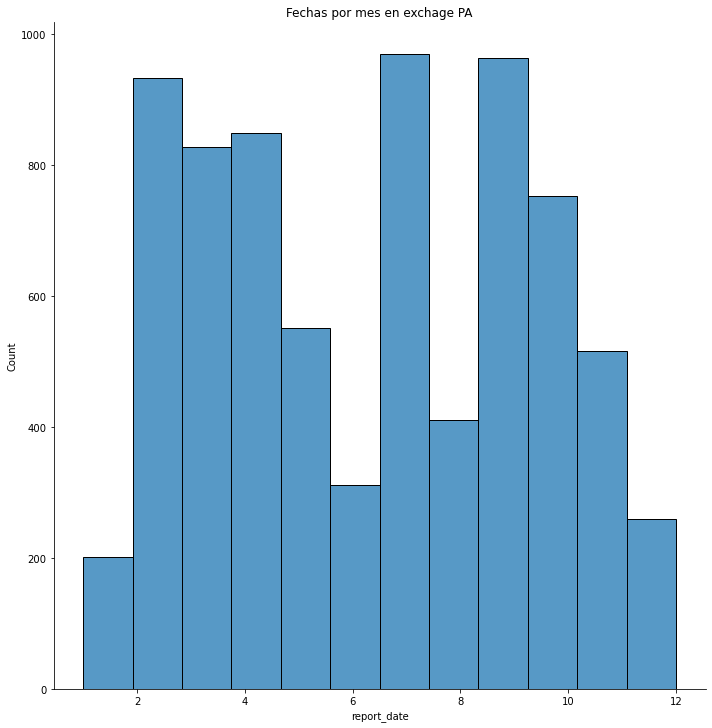

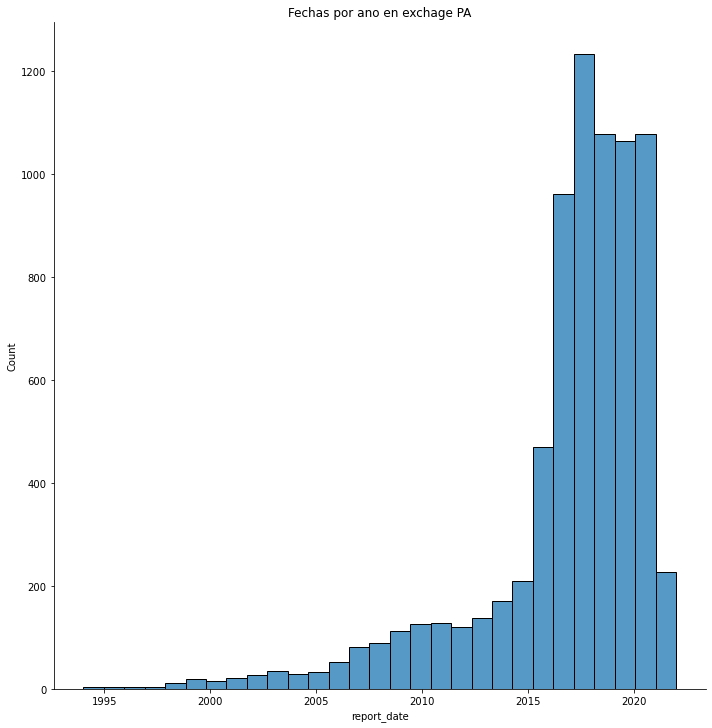

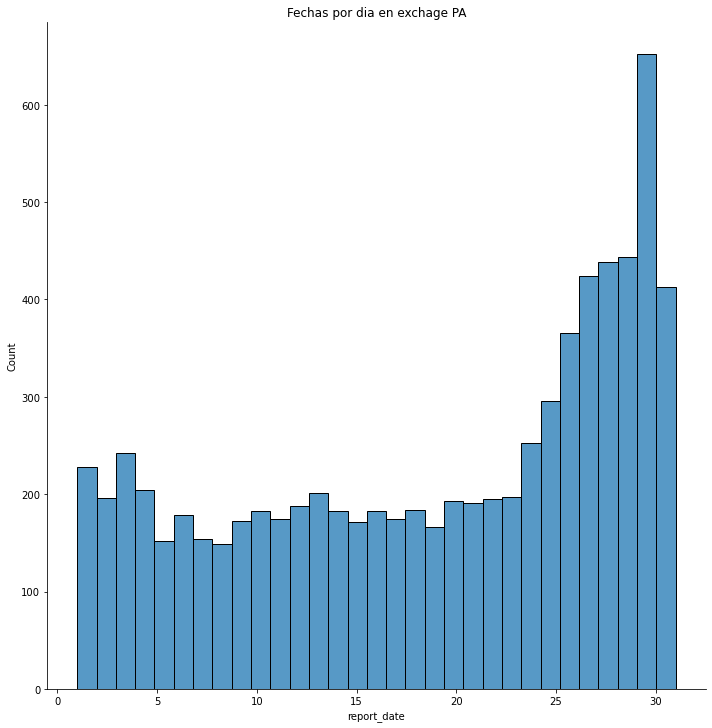

In [8]:
import seaborn as sns
for exchange in ["MC","LSE","XETRA","US","PA","MI","TO","AU","CO","HE","SA","PA"]:
    try:
        data=bd.executeQueryDataFrame("select * from calendarioResultados where exchange=%s and actual is NOT NULL",(exchange,))
        sns.displot(x=pd.to_datetime(data["report_date"]).dt.month ,bins=12,height=10)
        plt.title("Fechas por mes en exchage {}".format(exchange))
        sns.displot(x=pd.to_datetime(data["report_date"]).dt.year ,bins=len(np.unique(pd.to_datetime(data["report_date"]).dt.year)),height=10)
        plt.title("Fechas por ano en exchage {}".format(exchange))
        sns.displot(x=pd.to_datetime(data["report_date"]).dt.day ,bins=31,height=10)
        plt.title("Fechas por dia en exchage {}".format(exchange))
    except Exception as e:
        print(e)
    

In [ ]:
exchanges=["MC","US","XETRA","LSE","PA","TO","CO","HE"]
exchanges=iter(exchanges)

In [ ]:
e=next(exchanges)

In [ ]:
precios1=bd.executeQueryDataFrame("select * from {}_precios where fecha>='2021-01-01'".format(e),None)

In [ ]:
precios1["fecha"]=pd.to_datetime(precios1["fecha"])

In [ ]:
p2=precios1.groupby("stock").tail(1)
p1=precios1.groupby("stock").head(1)
p1.set_index("stock",inplace=True)
p2.set_index("stock",inplace=True)

In [ ]:
p1["diff"]=(p2.Adjusted_close-p1.Adjusted_close)/p1.Adjusted_close
p1["Adj_late"]=p2.Adjusted_close
p1=p1.sort_values(by="diff")
p1.head(20)

In [5]:
bd.executeQueryDataFrame("select min(report_date) from calendarioResultados",None)

,min(report_date)
0,2015-01-01


In [ ]:
exchange="US"
stock="NFLX"
fund=bd.executeQueryDataFrame("select netIncome, from US_fundamental where stock=%s".format(exchange),(stock,))